In [1]:
from datetime import datetime, date

import matplotlib
import numpy as np
import pandas as pd
import pandas
from pandas_datareader import data
import matplotlib.pyplot as plt


In [2]:
def calculateRfMean():
    datasetPath = './DGS3MO.csv'
    dataset = pd.read_csv(datasetPath)
    data = pd.DataFrame(dataset, columns=['DATE', 'DGS3MO'])

    rfValue = data['DGS3MO']
    countValues = len(data['DGS3MO'])
    d0 = date(2018, 1, 2)
    d1 = date(2021, 7, 19)
    delta = d1 - d0
    print("delta: ", delta, "    delta.days: ",delta.days )
    sum = 0

    for i in range(len(data['DGS3MO'])):
        sum = sum + float(rfValue[i])

    print("SUM: ",sum)
    print("countValues: ", countValues)
    avgRf = sum/delta.days
    return avgRf

## Pull the stock price data

In [ ]:
#pull the stock price data
start = datetime(2017, 12, 31)
end = datetime(2019, 7, 19)

avgRf = calculateRfMean()
print("calculated avg Rf in a period from 2018-01-01 to 2021-07-19: ",avgRf)

#import data
df = data.DataReader(['AAPL', 'FB', 'GOOGL', 'AMZN', 'MSFT'], 'yahoo', start, end)
print(df)


In [7]:
#get closing price
df = df['Adj Close']
#df = df.pct_change().dropna()
print(df)


Symbols          AAPL          FB        GOOGL         AMZN        MSFT
Date                                                                   
2018-01-02  41.310070  181.419998  1073.209961  1189.010010   82.004974
2018-01-03  41.302879  184.669998  1091.520020  1204.199951   82.386620
2018-01-04  41.494736  184.330002  1095.760010  1209.589966   83.111740
2018-01-05  41.967163  186.850006  1110.290039  1229.140015   84.142174
2018-01-08  41.811283  188.279999  1114.209961  1246.869995   84.228027
...               ...         ...          ...          ...         ...
2019-07-15  50.358139  203.910004  1150.510010  2020.989990  135.895737
2019-07-16  50.183903  203.839996  1153.459961  2009.900024  134.115097
2019-07-17  49.901699  201.800003  1146.739990  1992.030029  133.322647
2019-07-18  50.468563  200.779999  1147.239990  1977.900024  133.469391
2019-07-19  49.715195  198.360001  1131.550049  1964.520020  133.665039

[389 rows x 5 columns]


In [8]:
#It is common practice in portfolio optimization to take log of returns for calculations of covariance and correlation.
# Percentage change in stock prices (everyday)
# log of returns is time additive!!
logChange = df.pct_change().apply(lambda x: np.log(1 + x))
print("logChange:\n",logChange)

logChange:
 Symbols         AAPL        FB     GOOGL      AMZN      MSFT
Date                                                        
2018-01-02       NaN       NaN       NaN       NaN       NaN
2018-01-03 -0.000174  0.017756  0.016917  0.012694  0.004643
2018-01-04  0.004634 -0.001843  0.003877  0.004466  0.008763
2018-01-05  0.011321  0.013579  0.013173  0.016033  0.012322
2018-01-08 -0.003721  0.007624  0.003524  0.014322  0.001020
...              ...       ...       ...       ...       ...
2019-07-15  0.009351 -0.004697  0.004504  0.004955  0.000000
2019-07-16 -0.003466 -0.000343  0.002561 -0.005503 -0.013190
2019-07-17 -0.005639 -0.010058 -0.005843 -0.008931 -0.005926
2019-07-18  0.011296 -0.005067  0.000436 -0.007119  0.001100
2019-07-19 -0.015040 -0.012126 -0.013771 -0.006788  0.001465

[389 rows x 5 columns]


In [10]:
#The variance in prices of stocks of each asset are an important indicator of how volatile this investment will be (how returns can fluctuate).
apple = logChange['AAPL']
fb = logChange['FB']
google = logChange['GOOGL']
amazon = logChange['AMZN']
microsoft = logChange['MSFT']

var_apple = apple.var()
var_fb = fb.var()
var_google = google.var()
var_amazon = amazon.var()
var_microsoft = microsoft.var()
print("\nvar_apple:", var_apple,"var_fb:",var_fb,"var_google:",var_google,"var_amazon:",var_amazon,"var_microsoft:",var_microsoft,"\n" )


var_apple: 0.0003273430021862822 var_fb: 0.0005287424519967973 var_google: 0.000289995133509586 var_amazon: 0.0004274870940796111 var_microsoft: 0.00026653962558421734 



In [11]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = logChange.std().apply(lambda x: x * np.sqrt(250))
print("annual sd:\n", ann_sd)

annual sd:
 Symbols
AAPL     0.286069
FB       0.363573
GOOGL    0.269256
AMZN     0.326912
MSFT     0.258137
dtype: float64


In [12]:
# covariance and correlation matrix to understand how different assets behave with respect to each other
#covariance
cov_matrix = logChange.cov()
print("covariance matrix:\n", cov_matrix)

covariance matrix:
 Symbols      AAPL        FB     GOOGL      AMZN      MSFT
Symbols                                                  
AAPL     0.000327  0.000182  0.000195  0.000237  0.000200
FB       0.000182  0.000529  0.000241  0.000272  0.000195
GOOGL    0.000195  0.000241  0.000290  0.000257  0.000213
AMZN     0.000237  0.000272  0.000257  0.000427  0.000257
MSFT     0.000200  0.000195  0.000213  0.000257  0.000267


In [13]:
#correlation
corr_matrix = logChange.corr()
print("correlation matrix:\n", corr_matrix)

correlation matrix:
 Symbols      AAPL        FB     GOOGL      AMZN      MSFT
Symbols                                                  
AAPL     1.000000  0.436398  0.632008  0.633888  0.677111
FB       0.436398  1.000000  0.614478  0.572678  0.518792
GOOGL    0.632008  0.614478  1.000000  0.729427  0.766345
AMZN     0.633888  0.572678  0.729427  1.000000  0.760492
MSFT     0.677111  0.518792  0.766345  0.760492  1.000000


In [14]:
#expected return (individual)
#yearly returns for individual companies (argument 'Y' stands for "yearly")
#individual_expectedReturn
ind_er = df.resample('Y').last().pct_change().mean()
print("individual expected return:\n", ind_er)

individual expected return:
 Symbols
AAPL     0.294804
FB       0.513159
GOOGL    0.082865
AMZN     0.307962
MSFT     0.355827
dtype: float64


In [15]:
#now, to compute the portfolio expected return we need to multiply each return for its weight
#but we will do it later on once we have got the optimal

# Creating a table for visualising returns and volatility of individual assets
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
print("assets:\n",assets)

assets:
           Returns  Volatility
Symbols                      
AAPL     0.294804    0.286069
FB       0.513159    0.363573
GOOGL    0.082865    0.269256
AMZN     0.307962    0.326912
MSFT     0.355827    0.258137


1000 portfolios:
        Returns  Volatility  AAPL weight  FB weight  GOOGL weight  AMZN weight  \
0     0.258176    0.245102     0.278588   0.140357      0.364688     0.066595   
1     0.383373    0.259291     0.190750   0.346331      0.027027     0.165586   
2     0.333753    0.266922     0.143193   0.395535      0.252236     0.140297   
3     0.295145    0.240796     0.316244   0.122109      0.220083     0.010881   
4     0.250244    0.251231     0.322532   0.135362      0.364405     0.161480   
...        ...         ...          ...        ...           ...          ...   
9995  0.279699    0.247851     0.190087   0.109944      0.267402     0.184593   
9996  0.344116    0.258807     0.138810   0.264433      0.119900     0.253129   
9997  0.328922    0.254212     0.398262   0.309669      0.181623     0.036481   
9998  0.319904    0.244964     0.357474   0.217639      0.174392     0.015625   
9999  0.282904    0.248026     0.219428   0.072939      0.224019     0.205990   

      MSF

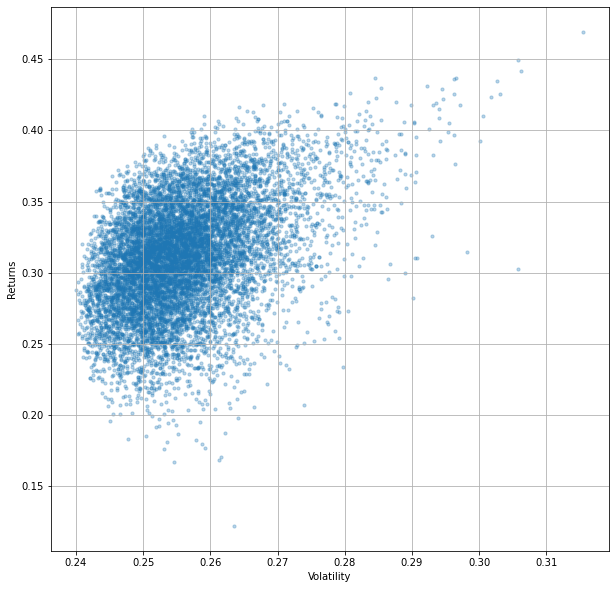

In [16]:
#Next, to plot the graph of efficient frontier, we need run a loop.
#In each iteration, the loop considers different weights for assets and calculates the return and volatility
# of that particular portfolio combination.
# We run this loop a 10000 times.

p_ret = []  # Define an empty array for portfolio returns
p_vol = []  # Define an empty array for portfolio volatility
p_weights = []  # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er)  # Returns are the product of individual expected returns of asset and its
    # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()  # Portfolio Variance
    sd = np.sqrt(var)  # Daily standard deviation
    ann_sd = sd * np.sqrt(250)  # Annual standard deviation = volatility
    p_vol.append(ann_sd)

resultData = {'Returns': p_ret, 'Volatility': p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    # print(counter, symbol)
    resultData[symbol + ' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(resultData)
print("1000 portfolios:\n",portfolios) # Dataframe of the 1000 portfolios created

#There are a number of portfolios with different weights, returns and volatility
#Plotting the returns and volatility from this dataframe will show the efficient frontier for our portfolio.

#plt.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10, 10])
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10, 10])
plt.show()



min_vol_port: 
 Returns         0.287597
Volatility      0.239993
AAPL weight     0.241198
FB weight       0.084739
GOOGL weight    0.243763
AMZN weight     0.006376
MSFT weight     0.423923
Name: 2068, dtype: float64


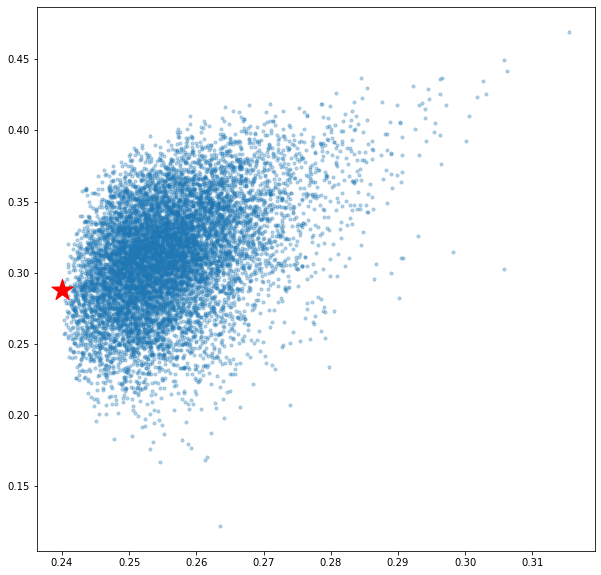

In [17]:
#On this graph, we can see the combination of weights that will give all possible combinations:
#Minimum volatility (left most point), Maximum returns (top most point) and everything in between

#let's calculate minimum volatility portfolio
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
print("\nmin_vol_port: \n",min_vol_port)

#minimum volatility is in this portfolio (min_vol_port)
#now we'll plot this point on the efficient frontier graph

# plotting the minimum volatility portfolio
plt.subplots(figsize=[10, 10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

plt.show()


optimal_risky_port: 
 Returns         0.410031
Volatility      0.259000
AAPL weight     0.171129
FB weight       0.417140
GOOGL weight    0.002211
AMZN weight     0.007921
MSFT weight     0.401599
Name: 2424, dtype: float64


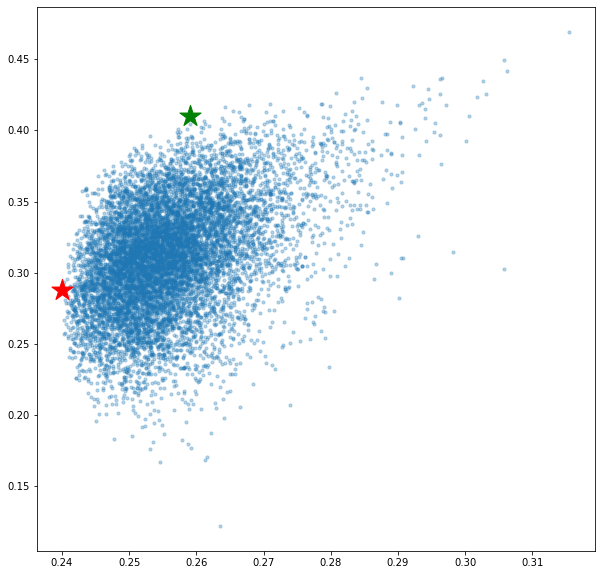

In [18]:
#The optimal risky portfolio is the one with the highest Sharpe ratio (cfr formula)
#Now we need to define the risk factor in order to find optimal portfolio

rf = 0.08  # risk factor
#rf = avgRf
optimal_risky_port = portfolios.iloc[((portfolios['Returns'] - rf) / portfolios['Volatility']).idxmax()]
print("\noptimal_risky_port: \n", optimal_risky_port)

# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

plt.show()

In [19]:
 #weighted optimal portfolio's variance
weightsDictionary = {'AAPL': optimal_risky_port[2], 'FB': optimal_risky_port[3], 'GOOGL': optimal_risky_port[4],
                      'AMZN': optimal_risky_port[5], 'MSFT': optimal_risky_port[6]}
port_var = cov_matrix.mul(weightsDictionary, axis=0).mul(weightsDictionary, axis=1).sum().sum()
print("\noptimal portfolio's variance: \n",port_var)


optimal portfolio's variance: 
 0.0002683248306875822


In [20]:
#optimal portfolio expected returns
weightsArray = [optimal_risky_port[2], optimal_risky_port[3], optimal_risky_port[4],
                     optimal_risky_port[5], optimal_risky_port[6]]
port_er = (weightsArray*ind_er).sum()
print("portfolio expected returns: \n", port_er)

portfolio expected returns: 
 0.4100308176426729


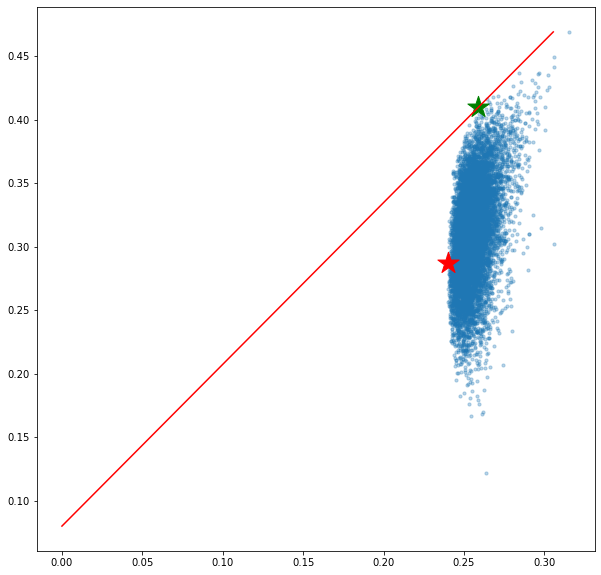

In [21]:
#plot capital market line
cal_x = []
cal_y = []
utility = []
a = 5

#utility can be seen as a measure of relative satisfaction of the investments.
#investors is risk saver (preferrs high return)
#E(R) = expected return of investment
#sd = risk of investment
#A = measure of risk adversion (higher A, higher risk?)

for er in np.linspace(rf, max(portfolios['Returns'])):
    #questa è formula "capital market line" NUOVA FRONTIERA EFFICIENTE negli appunti !!!
    sd = (er -rf)/((optimal_risky_port[0]-rf)/optimal_risky_port[1])
    cal_x.append(sd)
    cal_y.append(er)
    calculateUtility = er - .5 * a * (sd ** 2)
    utility.append(calculateUtility)

# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.plot(cal_x, cal_y, color='r')
plt.show()

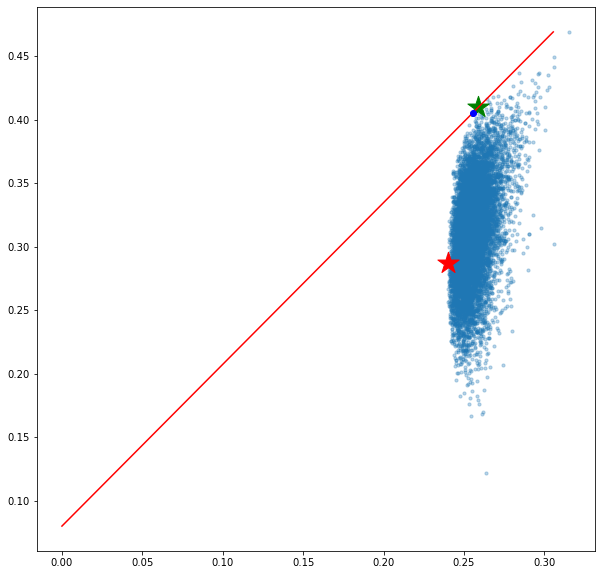

In [22]:
#investor's optimal portfolio
data2 = {'utility': utility, 'cal_y': cal_y, 'cal_x': cal_x}
cml = pd.DataFrame(data2)
investors_port = cml.iloc[cml['utility'].idxmax()]

plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.plot(cal_x, cal_y, color='r')
plt.plot(investors_port[2], investors_port[1], 'o', color='b')


plt.show()